In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *
import scipy as sp
import matplotlib.mlab as mlab
import scipy.integrate as integrate
from scipy.optimize import curve_fit

In [17]:
V1, C1, r1, V2, C2, r2, V3, C3, r3 = np.loadtxt("lab 2 data.csv", skiprows = 1, delimiter = ',', unpack = True)

[0.043 0.035 0.032 0.03  0.029]


In [21]:
def Bc(I):
    mu = 4*np.pi*10**-7
    n = 130
    R = 0.175
    Bc = ((4/5)**(3/2))*(mu*n*I/R)
    return Bc

def linear(m, x, b):
    return m*x+b

In [22]:
Bc1 = Bc(C1)
Bc2 = Bc(C2)
Bc3 = Bc(C3)

2.9843604478128633e-05
1122787189.36228
0.00021557624131121687


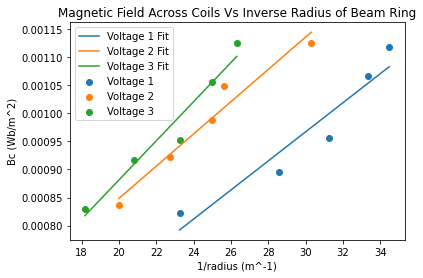

In [41]:
plt.scatter(1/r1, Bc1, label = "Voltage 1")
plt.scatter(1/r2, Bc2, label = "Voltage 2")
plt.scatter(1/r3, Bc3, label = "Voltage 3")

plt.xlabel("1/radius (m^-1)")
plt.ylabel("Bc (Wb/m^2)")
plt.title("Magnetic Field Across Coils Vs Inverse Radius of Beam Ring")

p_opt1, p_cov1 = curve_fit(linear, 1/r1, Bc1, p0 = (0,0), absolute_sigma = True)
m_opt1 = p_opt1[0]
b_opt1 = p_opt1[1]
plt.plot(1/r1, linear(m_opt1, 1/r1, b_opt1), label = "Voltage 1 Fit")

p_opt2, p_cov2 = curve_fit(linear, 1/r2, Bc2, p0 = (0,0), absolute_sigma = True)
m_opt2 = p_opt2[0]
b_opt2 = p_opt2[1]
plt.plot(1/r2, linear(m_opt2, 1/r2, b_opt2), label = "Voltage 2 Fit")

p_opt3, p_cov3 = curve_fit(linear, 1/r3, Bc3, p0 = (0,0), absolute_sigma = True)
m_opt3 = p_opt3[0]
b_opt3 = p_opt3[1]
plt.plot(1/r3, linear(m_opt3, 1/r3, b_opt3), label = "Voltage 3 Fit")

plt.legend(loc = "best")

slopes = [m_opt1, m_opt2, m_opt3]
slope = np.mean(slopes)
 
ratio = 1/(slope**2)

print(ratio)

intercepts = [b_opt1, b_opt2, b_opt3]
Be = np.mean(intercepts)

print(Be)